In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("opsd_germany_daily.csv")
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [4]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index("Date")
data

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


the goal is to predict the consumption from the time series dataset

In [5]:
import sklearn.metrics as metrics

In [6]:
def regression_results(y_true, y_pred):

    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)

    print("Explained variance: ", round(explained_variance, 4))
    print("mean_squared_log_error:", round(mean_squared_log_error, 4))
    print("r2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

In [7]:
#create a new datafram with the consumption column
data_consumption = data[['Consumption']]

#make a new column with yesterdays values
data_consumption.loc[:, 'Yesterday'] = data_consumption.loc[:, 'Consumption'].shift()

#inserting another column with difference between yesterday and day before yesterday's consumption values
data_consumption.loc[:, 'Yesterday_Diff'] = data_consumption.loc[:, "Yesterday"].diff()

#drop the NAs
data_consumption = data_consumption.dropna()

In [8]:
data_consumption

,Consumption,Yesterday,Yesterday_Diff
Date,,,
2006-01-03,1442.53300,1380.52100,311.33700
2006-01-04,1457.21700,1442.53300,62.01200
2006-01-05,1477.13100,1457.21700,14.68400
2006-01-06,1403.42700,1477.13100,19.91400
2006-01-07,1300.28700,1403.42700,-73.70400
...,...,...,...
2017-12-27,1263.94091,1130.11683,18.83345
2017-12-28,1299.86398,1263.94091,133.82408
2017-12-29,1295.08753,1299.86398,35.92307


Now we are going to train the sets

In [9]:
X_train = data_consumption[:'2016'].drop(['Consumption'], axis = 1)
y_train = data_consumption.loc[:"2016", 'Consumption']

X_test = data_consumption['2017'].drop(['Consumption'], axis = 1)
Y_test = data_consumption.loc['2017', 'Consumption']

In [10]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

not sure what any of this does

In [11]:
models = []
models.append(('LR', LinearRegression()))
models.append(("NN", MLPRegressor(solver = 'lbfgs'))) #neural net
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators = 10)))
models.append(('SVR', SVR(gamma = 'auto')))

In [12]:
from sklearn.model_selection import cross_val_score

In [13]:
results = []
names = []

for name, model in models:

    tscv = TimeSeriesSplit(n_splits = 10)
    cv_results = cross_val_score(model, X_train, y_train, cv = tscv, scoring = 'r2')
    results.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.343747 (0.029773)
NN: 0.387354 (0.163036)
KNN: 0.646307 (0.083185)
RF: 0.618374 (0.092304)
SVR: -0.117944 (0.157755)


this is for the plotting

In [14]:
import matplotlib.pyplot as plt

In [15]:
plt.boxplot(results, labels = names)
plt.title('Algorithm Comparison')
plt.show()

ValueError: Dimensions of labels and X must be compatible

LR: 0.343747 (0.029773)
NN: 0.485232 (0.121729)
KNN: 0.646307 (0.083185)
RF: 0.616667 (0.079916)
SVR: -0.117944 (0.157755)


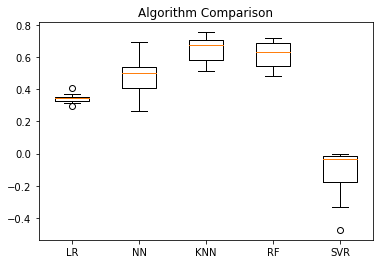

In [16]:
models = []
models.append(('LR', LinearRegression()))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

now they are going to use the grid search hyperparemeter

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
from sklearn.metrics import make_scorer
import numpy as np

def rmse(actual, predict):
    predict = np.array(actual)

    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score 

In [19]:
rmse_score = make_scorer(rmse, greater_is_better = False)

In [20]:
model = RandomForestRegressor()
param_search = {
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [i for i in range (5,15)]
}

tscv = TimeSeriesSplit(n_splits = 10)
gsearch = GridSearchCV(estimator = model, cv = tscv, param_grid = param_search, scoring = rmse_score)
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [21]:
y_true = Y_test.values
y_pred = best_model.predict(X_test)

regression_results(y_true, y_pred)

Explained variance:  0.7297
mean_squared_log_error: 0.0041
r2:  0.7249
MAE:  58.3113


NameError: name 'mse' is not defined

In [25]:


#this will make a new column with yesterday's consumption values
data_consumption.loc[:'Yesterday'] = data_consumption.loc[:, 'Consumption'].shift()

#this will insert another colum with difference between yesterday and day before yersterday's consumption values
data_consumption.loc[: 'Yesterday_Diff'] = data_consumption.loc[:, 'Yesterday'].diff()

#this will drop all of the NaN
data_consumption = data_consumption.dropna()

DateParseError: Unknown datetime string format, unable to parse: Yesterday

In [26]:
# creating copy of original dataframe
data_consumption_2o = data_consumption.copy()
# inserting column with yesterday-1 values
data_consumption_2o['Yesterday-1'] = data_consumption_2o['Yesterday'].shift()
# inserting column with difference in yesterday-1 and yesterday-2 values.
data_consumption_2o['Yesterday-1_Diff'] = data_consumption_2o['Yesterday-1'].diff()
# dropping NAs
data_consumption_2o = data_consumption_2o.dropna()

KeyError: 'Yesterday'

In [27]:
data_consumption

,Consumption
Date,
2006-01-01,1069.18400
2006-01-02,1380.52100
2006-01-03,1442.53300
2006-01-04,1457.21700
2006-01-05,1477.13100
...,...
2017-12-27,1263.94091
2017-12-28,1299.86398
2017-12-29,1295.08753
